<a href="https://colab.research.google.com/github/rlagksqls17/study_for_data_analysis/blob/main/%EC%9A%94%EC%9D%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 요인분석  



### **요인 분석의 개념**  ^ (1)

: 변수들 간의 상관관계를 고려하여 서로 유사한 변수들을 묶어 새로운 잠재요인들을 추출해내는 분석방법  
: **요인 분석을 수행하기 위해서는 변수가 간격척도 혹은 비율척도로 측정되어야 하며, 표본의 크기는 100개 이상이 바람직하며 최소 50개 이상이 되어야 한다.**

### 주성분 분석과 요인 분석 비교  

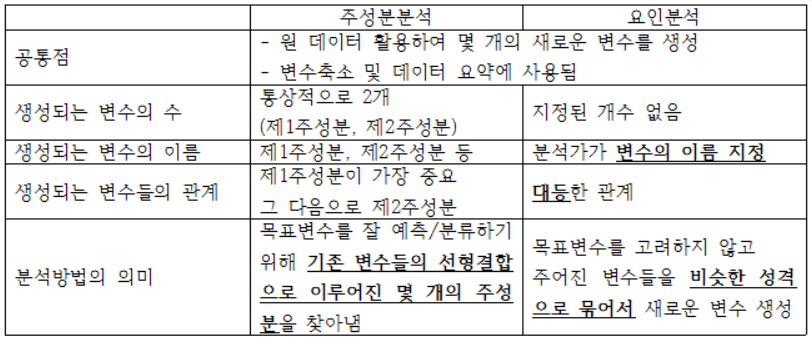









### **요인분석의 용어**

* 요인 : 상관계수가 높은 변수들을 묶어 새롭게 생성한 변수집단  
* 요인 적재값 : 변수와 해당 요인간의 상관계수  
* 요인행렬 : 요인 적재값을 모은 행렬  
* 고유값 : 각 요인에 대한 모든 변수들의 요인 적재값 제곱의 합  
* 공통성 : 여러 요인이 설명할 수 있는 한 변수의 분산의 양을 백분율로 나타낸 것

### **요인추출 방법**  

주성분분석은 전체 분산을 토대로 요인을 추출하지만, 공통요인분석은 공통분산만을 토대로 요인을 추출한다.  

### **요인의 수 결정**  
* 교유값을 기준으로 할 때는, 고유값이 1 이상에 해당하는 요인들을 추출한다.  
* 주성분분석과 마찬가지로 스크리 도표에서 요인의 설명력이 하락하다가 완만한 하락으로 추세가 바뀌기 직전 요인의 수를 기준으로 요인을 추출한다.  
* 경우에 따라 추출할 요인의 수를 사전에 정의한 후 요인분석을 수행할 수도 있다.

### **실전 문제**  

R의 내장 데이터 swiss는 1888년 경 스위스 내 47개 중의 사회 경제적 지표(교육, 농업 종사자 비율 등)와 출산율에 대한 데이터이다. 원할한 분석을 위해 먼저 해당 데이터의 6가지 변수들을 min-max 정규화한 뒤, 요인분석을 실시하여 변수들을 3개의 요인으로 축소해보자. (factanal 사용)  



#### R
1. swiss 데이터를 불러온 후 확인한다.
```
data(swiss)
str(swiss)
```  
>>>  
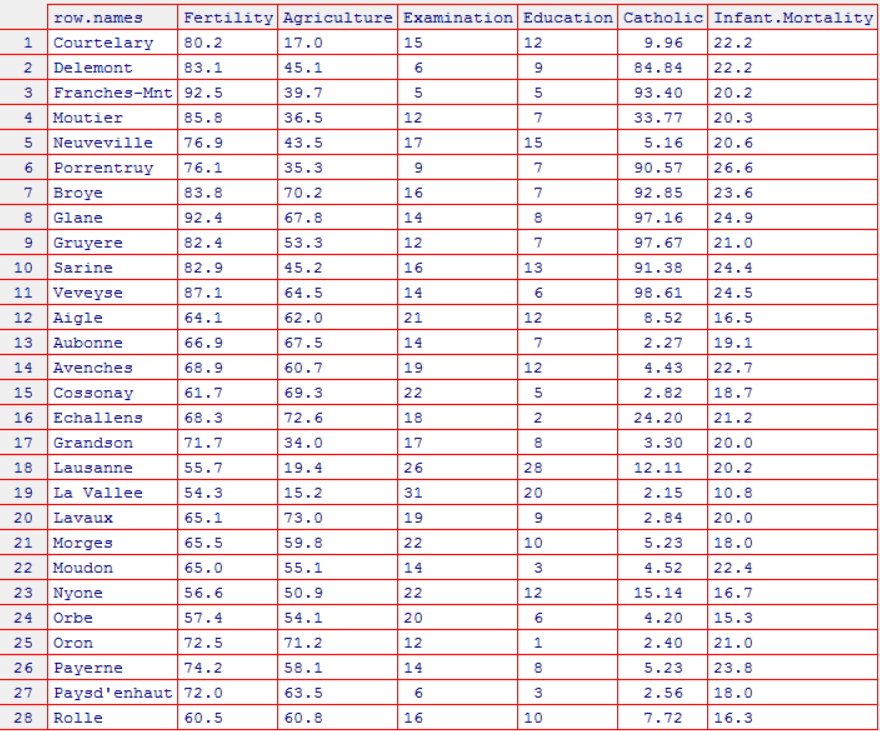




2. max-min 정규화 수행한다.  



```  
# apply(데이터, 계산방향, 적용함수) : 주어진 데이터의 행 혹은 열 방향으로 함수를 적용
Min <- apply(swiss, 2, min)  
Max <- apply(swiss, 2, max)  
swiss_fa <- scale(swiss, center = Min, scale = (Max-Min))
```

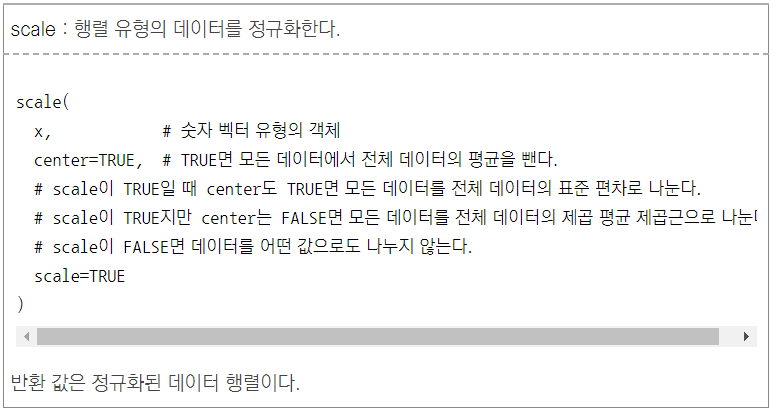  (2)




```
head(swiss_fa)  
```  

>>>  
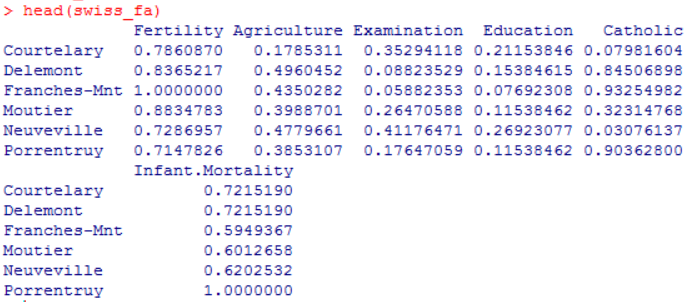


3. 요인분석 수행한다.  

```
factanal(swiss_fa, factors = 3)  
```  

>>>  
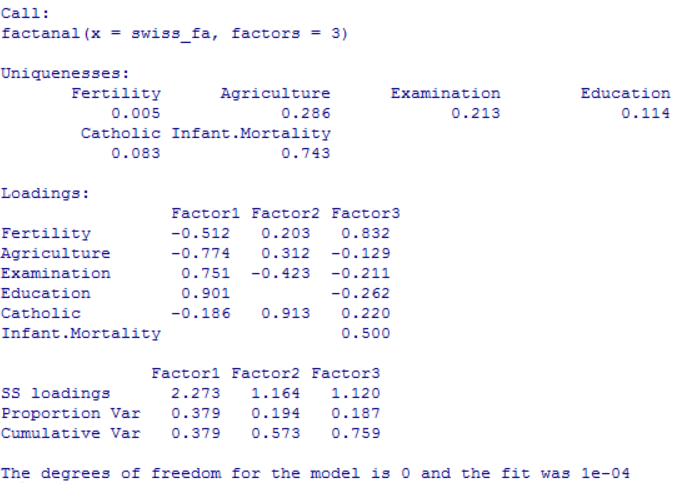

요인분석 결과  
 * Proportion Var : 각 요인이 설명하는 분산의 비율  
 * Cummulative Var : 요인별 해당 값의 누적치  
 * 세 번째 요인에 대한 Cummulative Var 값이 0.759이므로 세 요인은 전체 데이터 분산의 약 76%를 설명할 수 있다고 해석 가능

#### 파이썬  


In [ ]:
import pandas as pd 

# 데이터를 불러온다.

data = pd.read_csv("/content/drive/MyDrive/학습 자료/swiss.csv")
data.head() # R에서의 head(data)와 다름  


,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()  

swiss_fa = min_max_scaler.fit_transform(data.iloc[:, 1:])
df_swiss_fa = pd.DataFrame(swiss_fa,data.iloc[:,0], list(data.columns)[1:])
df_swiss_fa

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Location,,,,,,
Courtelary,0.786087,0.178531,0.352941,0.211538,0.079816,0.721519
Delemont,0.836522,0.496045,0.088235,0.153846,0.845069,0.721519
Franches-Mnt,1.000000,0.435028,0.058824,0.076923,0.932550,0.594937
Moutier,0.883478,0.398870,0.264706,0.115385,0.323148,0.601266
Neuveville,0.728696,0.477966,0.411765,0.269231,0.030761,0.620253
Porrentruy,0.714783,0.385311,0.176471,0.115385,0.903628,1.000000
Broye,0.848696,0.779661,0.382353,0.115385,0.926929,0.810127
Glane,0.998261,0.752542,0.323529,0.134615,0.970976,0.892405
Gruyere,0.824348,0.588701,0.264706,0.115385,0.976188,0.645570


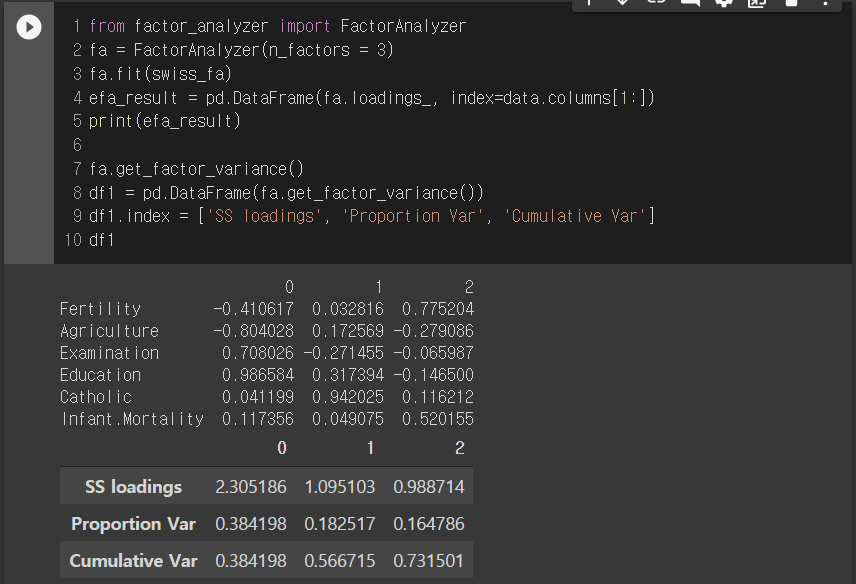

### **참고 및 인용문헌**  

(1) 윤종식 지음, "ADP 실기 데이터 분석 전문가" 2판, 데이터에듀, (2021)  

(2) https://thebook.io/006723/ch09/02/01/  